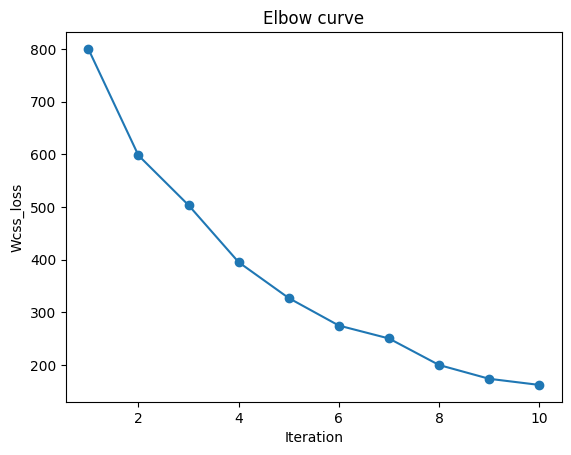

In [6]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# reading data

data = pd.read_csv('../datasets/Mall_Customers.csv')
Id =  data['CustomerID']
del data['CustomerID']
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])

# scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
new_data = scale.fit_transform(data)

# finding elbow of clusters

from sklearn.cluster import KMeans
wcss_loss = []
for i in range(1,11):
    cluster = KMeans(n_clusters=i,n_init='auto',random_state=0)
    cluster.fit(new_data)
    wcss_loss.append(cluster.inertia_)

# plotting elbow curve 


plt.plot(list(range(1,11)),wcss_loss,marker='o')
plt.xlabel('Iteration')
plt.ylabel('Wcss_loss')
plt.title('Elbow curve')
plt.show()


In [7]:
elbow = 9

# clustering

cluster = KMeans(n_clusters=elbow,n_init='auto',random_state=0)
y = cluster.fit_predict(new_data)
y_up = y + 1

result = pd.DataFrame({'cluster_no' : pd.Series(y_up)})

resulting_dataframe = pd.concat([data,result],axis=1)

# saving result  in a dataframe



,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_no
0,1,19,15,39,4
1,1,21,15,81,4
2,0,20,16,6,2
3,0,23,16,77,9
4,0,31,17,40,2


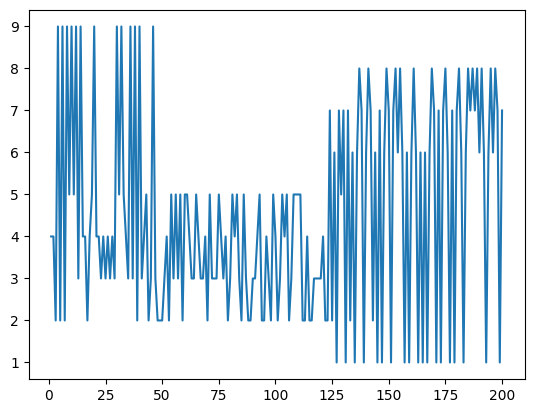